In [101]:
import numpy as np

In [102]:
import pandas as pd

In [103]:
import matplotlib.pyplot as plt

In [104]:
import seaborn as sns

In [105]:
from matplotlib import rcParams

In [106]:
rcParams['figure.figsize'] = 15,5

In [107]:
sns.set_style('darkgrid')

In [108]:
car_data = pd.read_csv('car_evaluation.csv', header= None)

In [109]:
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [110]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [111]:
car_data.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [112]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


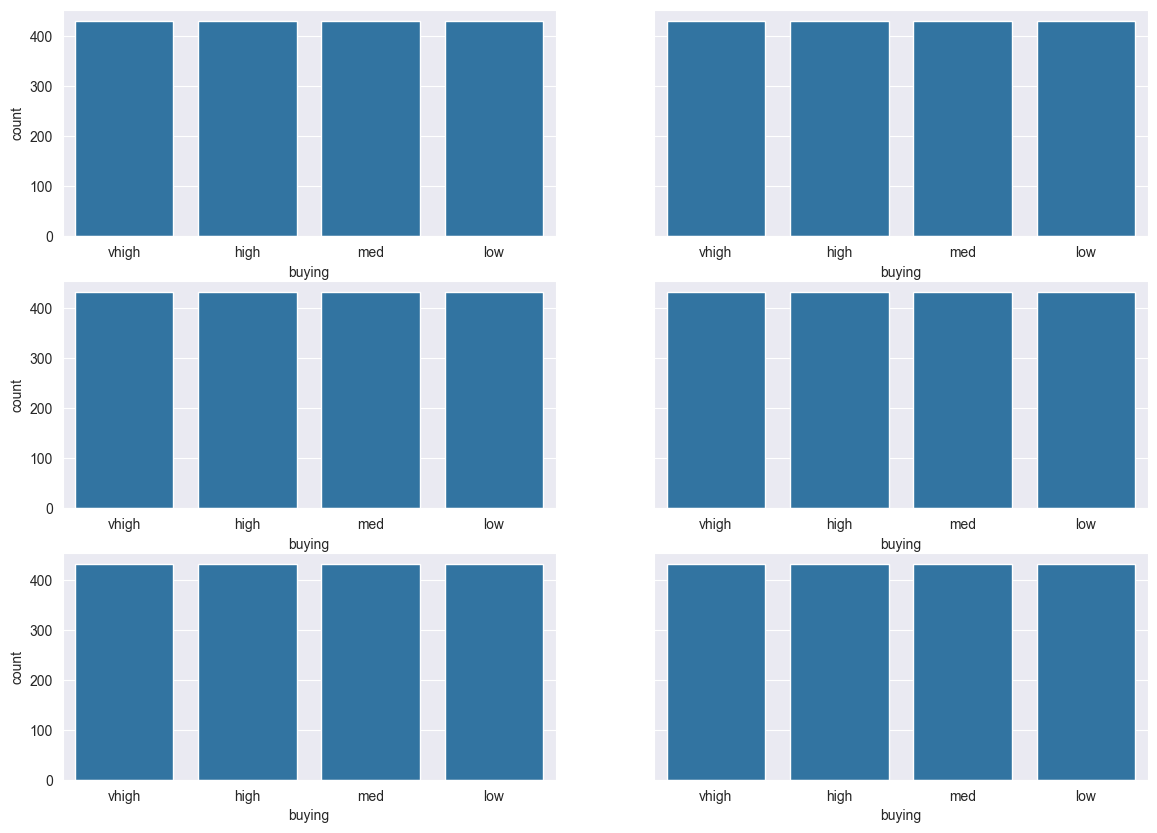

In [113]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, sharey = True, figsize = (14,10))
sns.countplot(x = car_data['buying'], ax = axes[0][0])
sns.countplot(x = car_data['buying'], ax = axes[0][1])
sns.countplot(x = car_data['buying'], ax = axes[1][0])
sns.countplot(x = car_data['buying'], ax = axes[1][1])
sns.countplot(x = car_data['buying'], ax = axes[2][0])
sns.countplot(x = car_data['buying'], ax = axes[2][1])
plt.show()

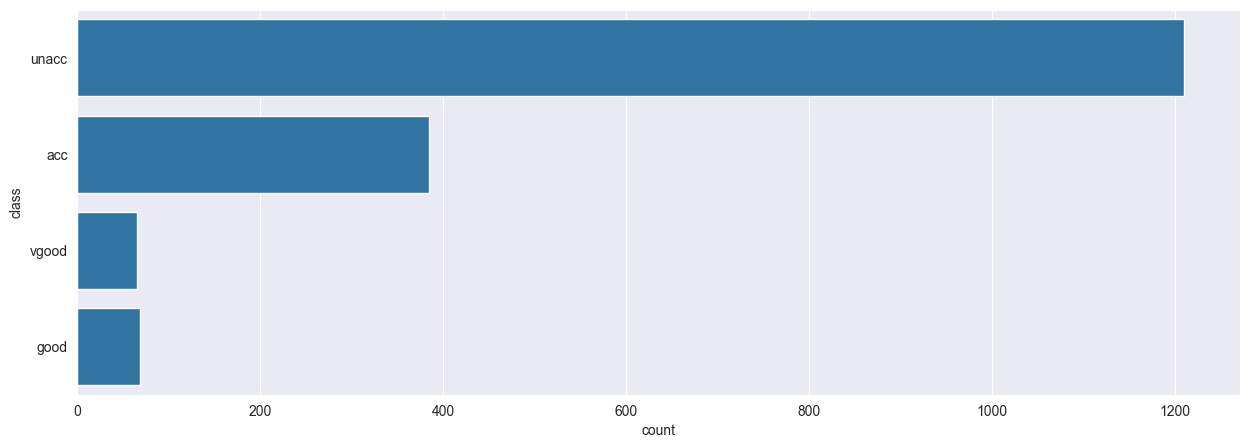

In [114]:
sns.countplot(car_data['class'])
plt.show()

In [115]:
car_data['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [116]:
#Data Preprocessing

In [117]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [118]:
buying_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
maint_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
doors_mappings = {'2':2, '3':3, '4':4, '5more':5}
persons_mappings = {'2':2, '3':3, '4':4, 'more':5}
lug_boot_mappings = {'small':0, 'med':1, 'big':2}
safety_mappings = {'low':0, 'med':1, 'high':2}
class_mappings = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

In [119]:
car_data['buying'] = car_data['buying'].map(buying_mappings)
car_data['maint'] = car_data['maint'].map(maint_mappings)
car_data['doors'] = car_data['doors'].map(doors_mappings)
car_data['persons'] = car_data['persons'].map(persons_mappings)
car_data['lug_boot'] = car_data['lug_boot'].map(lug_boot_mappings)
car_data['safety'] = car_data['safety'].map(safety_mappings)
car_data['class'] = car_data['class'].map(class_mappings)

In [120]:
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [121]:
#Creating Our Tree Models

In [122]:
from sklearn.model_selection import train_test_split

x = car_data[['buying','maint','doors','persons','lug_boot','safety']]
y = car_data['class']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [123]:
from sklearn.tree import DecisionTreeClassifier

criterion_gini_index = DecisionTreeClassifier(max_depth=3, random_state=0)
criterion_gini_index.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [124]:
#Model Evaluation

In [125]:
y_pred_gini = criterion_gini_index.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7861


In [127]:
y_pred_train_gini = criterion_gini_index.predict(x_train)
print('Training set score: {:.4f}'.format(criterion_gini_index.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(criterion_gini_index.score(x_train, y_train)))

Training set score: 0.7940
Test set score: 0.7940


In [128]:
#Visualize decision-trees

In [129]:
from sklearn import tree

[Text(0.3333333333333333, 0.875, 'x[5] <= 0.5\ngini = 0.457\nsamples = 1209\nvalue = [848, 263, 50, 48]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 399\nvalue = [399, 0, 0, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 3.0\ngini = 0.58\nsamples = 810\nvalue = [449.0, 263.0, 50.0, 48.0]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 264\nvalue = [264, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 1.5\ngini = 0.637\nsamples = 546\nvalue = [185.0, 263.0, 50.0, 48.0]'),
 Text(0.5, 0.125, 'gini = 0.647\nsamples = 280\nvalue = [35, 147, 50, 48]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.492\nsamples = 266\nvalue = [150, 116, 0, 0]')]

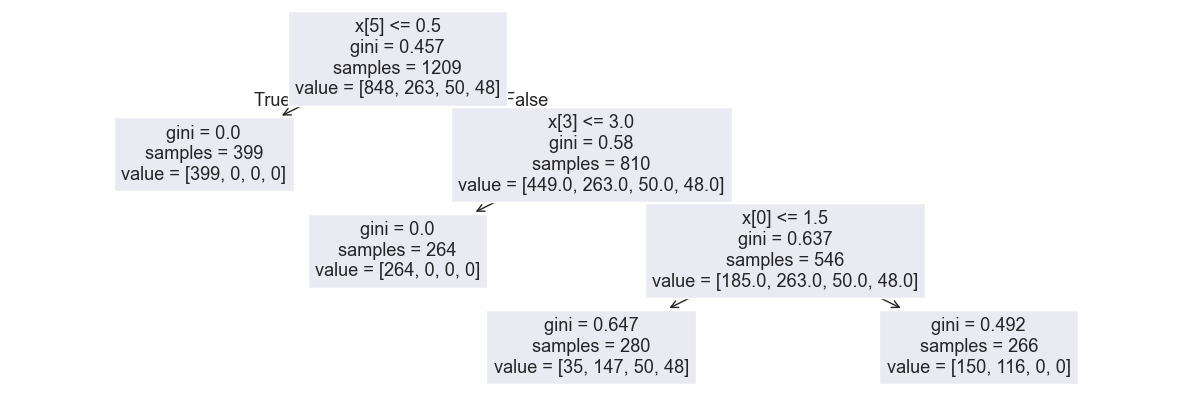

In [130]:
tree.plot_tree(criterion_gini_index)

In [131]:
plt.show()

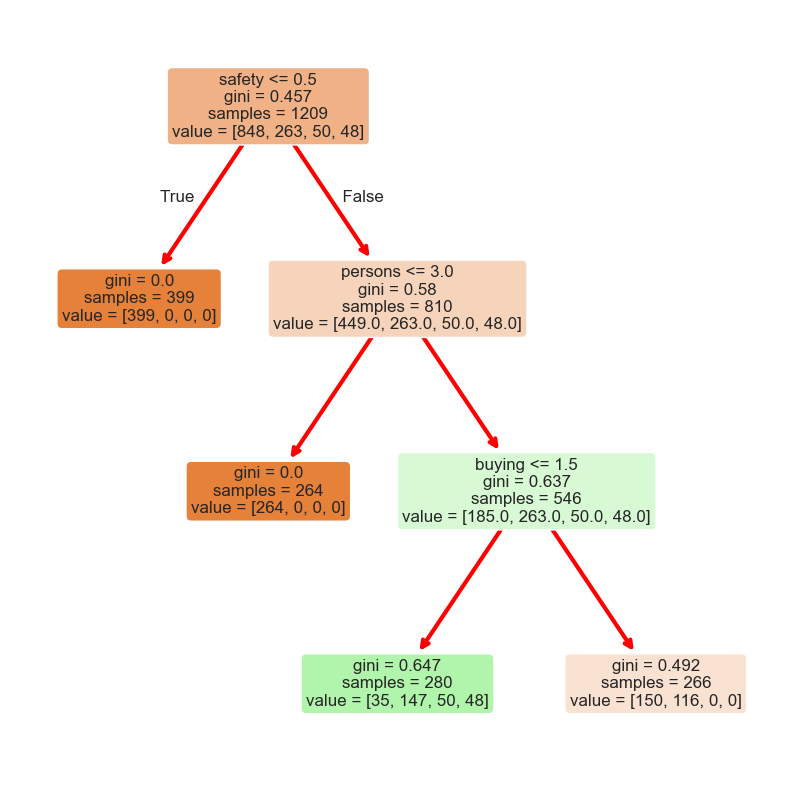

In [132]:
fig, ax = plt.subplots(figsize=(10,10))
out = tree.plot_tree(criterion_gini_index, filled=True, rounded=True, feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('Red')
        arrow.set_linewidth(3)

In [133]:
#Random Forests

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rfc = RandomForestClassifier(n_estimators = 100)

In [136]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [137]:
rfc_pred = rfc.predict(x_test)

In [138]:
print('Model Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test,rfc_pred)))

Model Accuracy Score: 0.9846
